In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\jenan\Downloads\E-commerce.xlsx")
data

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,android,8146.0,284263.0,5754.0,2125.0,13.0,1762.0,2018-11-15 09:46:00,207.0,latest,1,0
2021,2018-11-03 12:39:00,android,43622.0,284263.0,28621.0,2874.0,10.0,9375.0,2018-11-15 09:46:00,207.0,latest,1,0
2022,2018-11-03 12:41:00,android,12923.0,284263.0,28621.0,6105.0,17.0,2637.0,2018-11-15 09:46:00,3.0,latest,1,0
2023,2018-10-20 22:59:00,android,26523.0,418685.0,36253.0,3444.0,7.0,2037.0,2018-11-15 09:47:00,207.0,latest,0,0


In [3]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [5]:
#Checking for null values
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [6]:
#Removing unwanted columns
data.drop(['device_type','user_id','session_id'],axis=1,inplace=True)

In [7]:
data

,server_time,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0
...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,5754.0,2125.0,13.0,1762.0,2018-11-15 09:46:00,207.0,latest,1,0
2021,2018-11-03 12:39:00,28621.0,2874.0,10.0,9375.0,2018-11-15 09:46:00,207.0,latest,1,0
2022,2018-11-03 12:41:00,28621.0,6105.0,17.0,2637.0,2018-11-15 09:46:00,3.0,latest,1,0
2023,2018-10-20 22:59:00,36253.0,3444.0,7.0,2037.0,2018-11-15 09:47:00,207.0,latest,0,0


# Data Imputation

In [8]:
#Filling the missing data with mode
data['category']=data['category'].fillna(data['category'].mode()[0])
data['os_version']=data['os_version'].fillna(data['os_version'].mode()[0])


In [9]:
#Removing rows with null values
data=data.dropna()

In [10]:
data.isna().sum()

server_time        0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

# Outlier Detection

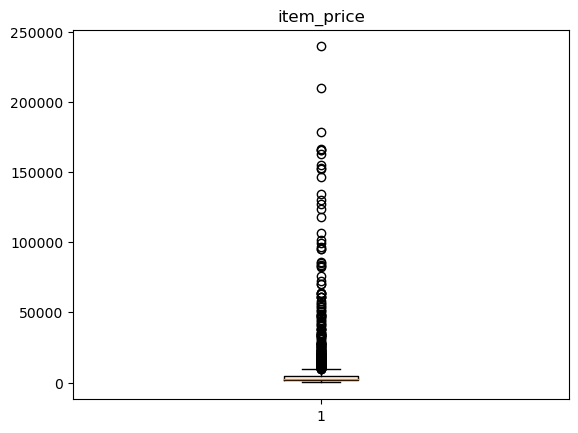

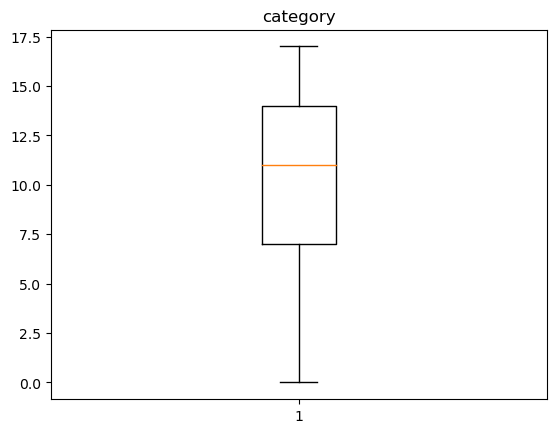

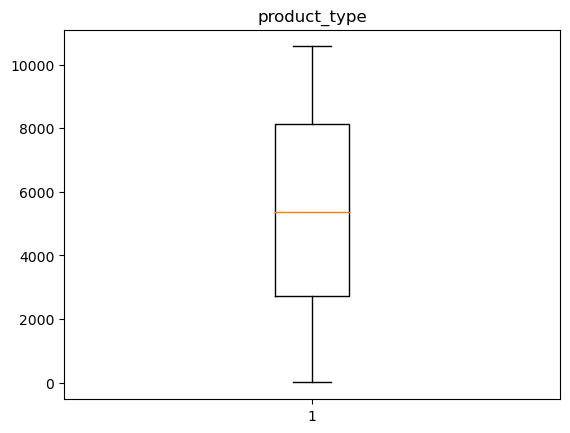

In [11]:
#Outlier detection using box plot
col=['item_price','category','product_type']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

It is natural to have outliers in prices of items.So it is not necessary to remove them.

# Encoding

In [12]:
#Labelencoding the categorical column 'os_version'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['os_version']=le.fit_transform(data['os_version'])

C:\Users\jenan\AppData\Local\Temp\ipykernel_162144\890584276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os_version']=le.fit_transform(data['os_version'])


In [13]:
data

,server_time,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,5754.0,2125.0,13.0,1762.0,2018-11-15 09:46:00,207.0,1,1,0
2021,2018-11-03 12:39:00,28621.0,2874.0,10.0,9375.0,2018-11-15 09:46:00,207.0,1,1,0
2022,2018-11-03 12:41:00,28621.0,6105.0,17.0,2637.0,2018-11-15 09:46:00,3.0,1,1,0
2023,2018-10-20 22:59:00,36253.0,3444.0,7.0,2037.0,2018-11-15 09:47:00,207.0,1,0,0


In [14]:
#Making a copy of the dataset
df=data.copy()

In [15]:
df.drop(['server_time','item_id','impression_time','app_code'],axis=1,inplace=True)
df

,item_price,category,product_type,os_version,is_4G,is_click
0,4602.0,11.0,3040.0,2,0,0
1,3513.0,12.0,6822.0,1,1,1
2,825.0,17.0,1619.0,0,1,0
3,2355.0,13.0,5264.0,1,1,0
4,1267.0,17.0,10239.0,1,0,0
...,...,...,...,...,...,...
2020,2125.0,13.0,1762.0,1,1,0
2021,2874.0,10.0,9375.0,1,1,0
2022,6105.0,17.0,2637.0,1,1,0
2023,3444.0,7.0,2037.0,1,0,0


# Scaling

In [16]:
#Minmax scaling
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler()
X=minmax.fit_transform(df)
X=pd.DataFrame(X)

In [17]:
X.describe()

,0,1,2,3,4,5
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.027796,0.605583,0.506662,0.490846,0.342405,0.049975
std,0.072314,0.291721,0.291167,0.342949,0.474632,0.217948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006067,0.411765,0.258730,0.500000,0.000000,0.000000
50%,0.010065,0.647059,0.506482,0.500000,0.000000,0.000000
75%,0.019959,0.823529,0.767957,0.500000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalization

In [18]:
X=preprocessing.normalize(df)
X=pd.DataFrame(X)

In [19]:
X.describe()

,0,1,2,3,4,5
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.532229,0.002081,0.726717,0.000193,0.000070,0.000008
std,0.311328,0.003633,0.302929,0.000294,0.000160,0.000048
min,0.002961,0.000000,0.000469,0.000000,0.000000,0.000000
25%,0.252247,0.000797,0.551417,0.000010,0.000000,0.000000
50%,0.489066,0.001446,0.872247,0.000132,0.000000,0.000000
75%,0.834225,0.002431,0.967662,0.000242,0.000104,0.000000
max,1.000000,0.121323,0.999995,0.006755,0.003377,0.001207


# Correlation Matrix and Heatmap

In [20]:
df.corr()

,item_price,category,product_type,os_version,is_4G,is_click
item_price,1.000000,0.049990,-0.023040,-0.013553,-0.019353,0.043272
category,0.049990,1.000000,-0.014183,0.013376,-0.010742,0.007427
product_type,-0.023040,-0.014183,1.000000,0.038756,-0.018226,0.040004
os_version,-0.013553,0.013376,0.038756,1.000000,-0.044603,0.039239
is_4G,-0.019353,-0.010742,-0.018226,-0.044603,1.000000,-0.002789
is_click,0.043272,0.007427,0.040004,0.039239,-0.002789,1.000000


<Axes: >

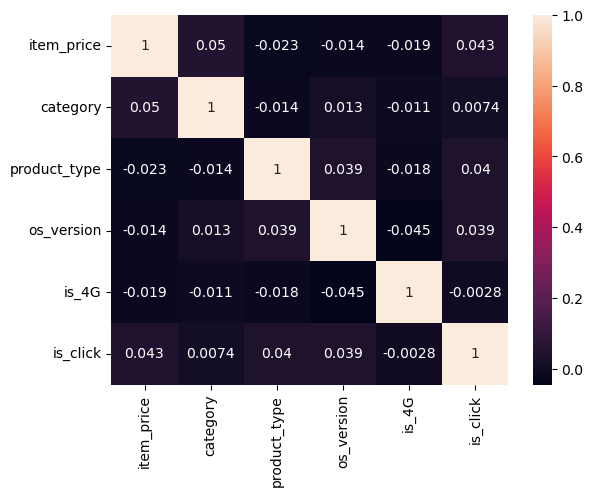

In [21]:
sns.heatmap(df.corr(),annot=True)